In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset 

In [2]:
df = pd.read_csv('E:\Edubrige EDA project\superstore_final_dataset (1).csv')

In [3]:
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21-05-2017,28-05-2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12-01-2016,17-01-2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


# Assesing the dataset

In [4]:
# Checking the shape OF the dataset

df.shape

(9800, 18)

In [5]:
# Checking the columns names of the dataset

df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Duplicate values Handling

In [7]:
# Checking the total Number of duplictes inthe data

df.duplicated().sum()

0

In [8]:
# As there is no duplicate data present we dont have to use df.drop_duplicate() function

# Handling Oder_date and Ship_date column

In [9]:
# In both the columns date is in object(string) format 
# So we have to convert them in datetime format

# We cant convert them directly using the pd.to_datetime() function becasue it accepts (yyyy/mm/dd or dd/mm/yyyy) format but in many records the date contain only single digit in day and month section 

#def date_handling(x):
    #words = x.split('/')
    #day = int(words[0])
    #month = int(words[1])
    #date = f"{words[2]}/{month:02}/{day:01}"
    #return date
    
def date_handling(x):
    # Splitting by both slashes and dashes
    if '/' in x:
        words = x.split('/')
    elif '-' in x:
        words = x.split('-')
    else:
        raise ValueError("Invalid date format")

    day = int(words[0])
    month = int(words[1])
    year = int(words[2])
    
    # Reformatting the date string to 'y/mm/dd' format
    date = f"{year:04}/{month:02}/{day:02}"
    
    return date
    

# Applying the function on oder_date and ship_date columns

df['Order_Date'] = df.Order_Date.apply(date_handling)
df['Ship_Date'] = df.Ship_Date.apply(date_handling)

# Converting them to datetime format 

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')


In [10]:
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9800 non-null   int64         
 1   Order_ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_Date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   object        
 5   Customer_ID    9800 non-null   object        
 6   Customer_Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal_Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product_ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub_Category   9800 n

# Most important segment 

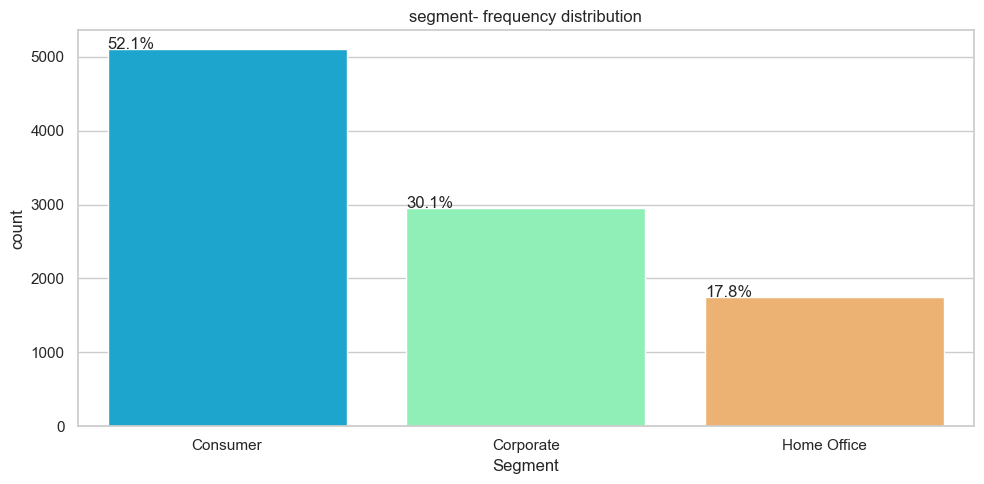

In [28]:
#This variable holds the name of the column in the DataFrame that you want to visualize.
segcol = "Segment"

df_segmentchart = df

# This line sets the Seaborn theme to "whitegrid", which provides a white background with grid lines.
sns.set_theme(style="whitegrid")

# This line calculates the value counts of the column specified by colName and sorts them in descending order. It counts the frequency of each unique value in the column.
val = df_segmentchart[segcol].value_counts().sort_values(ascending=False)

#Creating the count plot:
plt.figure(figsize=(10,5))
ax=sns.countplot(df_segmentchart, x=segcol, palette="rainbow", order=val.index)

# This line calculates the sum of all the counts in val.
seg_sum=val.sum()

# This line calculates the percentage of each category count relative to the total count and formats it as a string with one decimal point.
seg_lbls = [f'{p[0] * 100 / seg_sum:.1f}%' for p in zip(val)]

# This loop iterates over each bar (patch) in the plot and annotates it with the corresponding label from lbls. It adds the label just above each bar.
for p, label in zip(ax.patches, seg_lbls):
    ax.annotate(label, (p.get_x(), p.get_height() + 0.15))
    
plt.title("segment- frequency distribution",fontsize=12)
plt.tight_layout()
plt.show()


# Mean of sales per segment

In [ ]:
salecol = "Sales"
mean_sale_per_seg = df
sns.barplot(x=segcol,y=salecol,data=mean_sale_per_seg)
plt.title("Mean of sales per segment",fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Insight : Though most number of product sold is from "Consumer" segment but still most portion of sales is from "home Office" segment.

# Sum of the sales per category

Text(0.5, 0, 'Category')

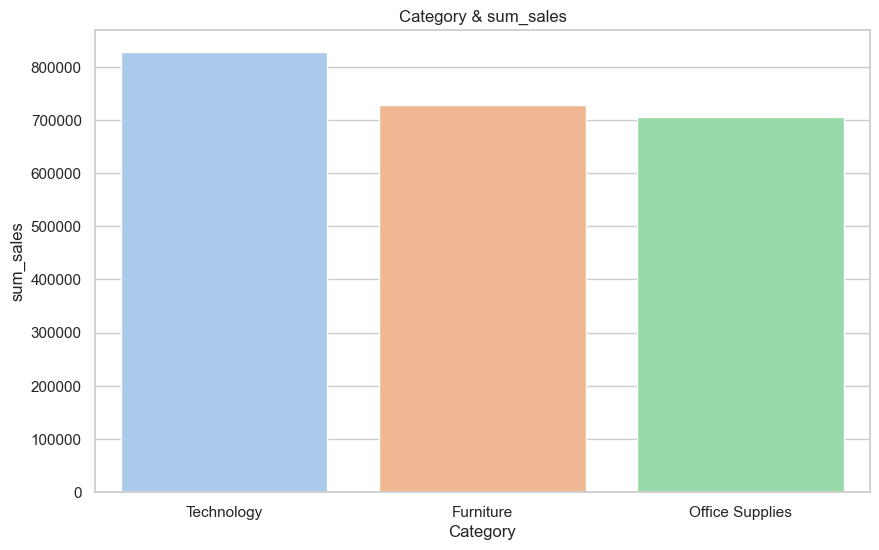

In [13]:
"""This line groups the DataFrame df by the 'category' column. Within each group, it aggregates the 'sales' column using the sum() function 
to calculate the total sales.The result is stored in a new DataFrame called group_df."""
cat_sale_group = df.groupby(['Category']).agg(sum_sales=('Sales','sum')).sort_values(by='sum_sales',ascending=False).reset_index()

# Creating the barplot :
plt.figure(figsize=(10, 6))
ax = sns.barplot(data = cat_sale_group,x='Category',y='sum_sales',palette='pastel')
plt.title("Category & sum_sales",fontsize=12)
plt.xlabel("Category")

In [14]:
# Insight : Most money spend by the customers is on "Technology" category.

# Sum of sales per sub category

Text(0, 0.5, 'Sub Category')

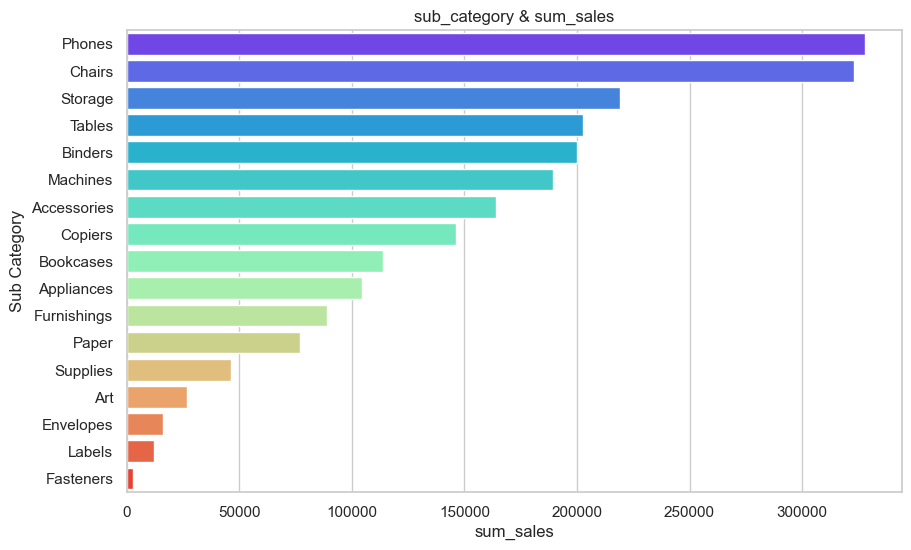

In [15]:
subcat_group = df.groupby(['Sub_Category']).agg(sum_sales=('Sales','sum')).sort_values(by='sum_sales',ascending=False).reset_index()

# Creating the barplot :
plt.figure(figsize=(10,6))
ax = sns.barplot(data=subcat_group, x='sum_sales', y='Sub_Category', palette='rainbow')
plt.title("sub_category & sum_sales",fontsize=12)
plt.ylabel("Sub Category")

In [16]:
# Insight : As we already know that most sales is in technology category of which a large portion is because of the contribution of sub category "Phones".

# Top 5 selling product

Text(0, 0.5, 'Product Name')

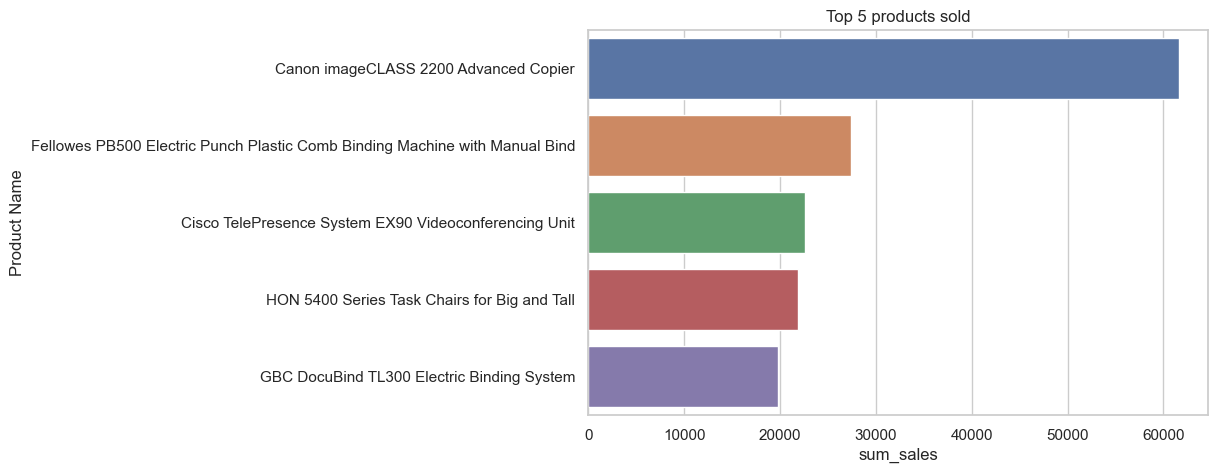

In [17]:
topproduct_group = df.groupby(['Product_Name']).agg(sum_sales=('Sales','sum')).sort_values(by='sum_sales',ascending=False).reset_index()

# This will show only top five products
topproduct_group = topproduct_group.head(5)

# Creating the figure : 
plt.figure(figsize=(8,5))
ax = sns.barplot(data=topproduct_group,x='sum_sales', y='Product_Name')
plt.title("Top 5 products sold",fontsize=12)
plt.ylabel("Product Name")

In [18]:
# Insight : These are the top 5 selling products and out of five , four are from technology category and one from furniture category which is "chair".

# Top 5 least sold product

Text(0, 0.5, '')

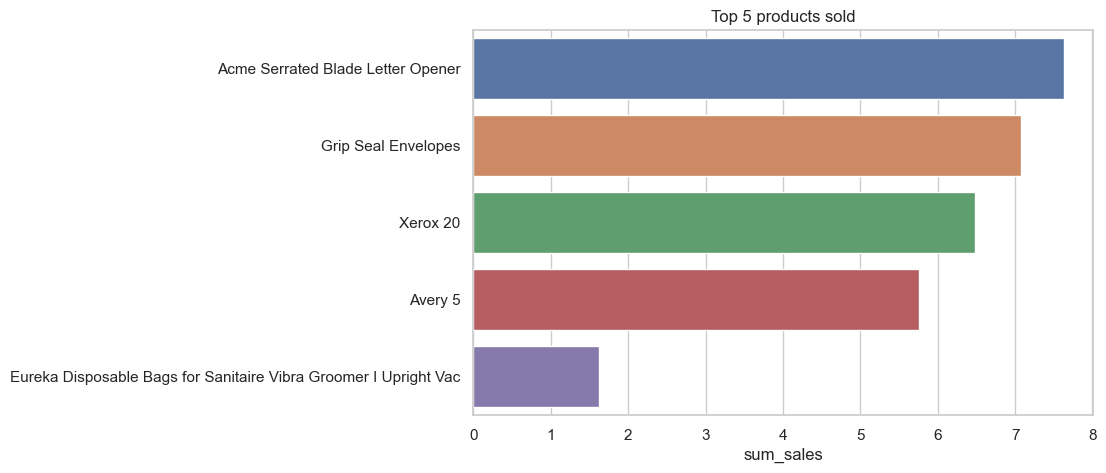

In [19]:
topproduct_group = df.groupby(['Product_Name']).agg(sum_sales=('Sales','sum')).sort_values(by='sum_sales',ascending=False).reset_index()

# This will show only top five products
topproduct_group = topproduct_group.tail(5)

# Creating the figure : 
plt.figure(figsize=(8,5))
ax = sns.barplot(data=topproduct_group,x='sum_sales', y='Product_Name')
plt.title("Top 5 products sold",fontsize=12)
plt.ylabel("")

# Top shipment mode used by customers

Text(0, 0.5, '')

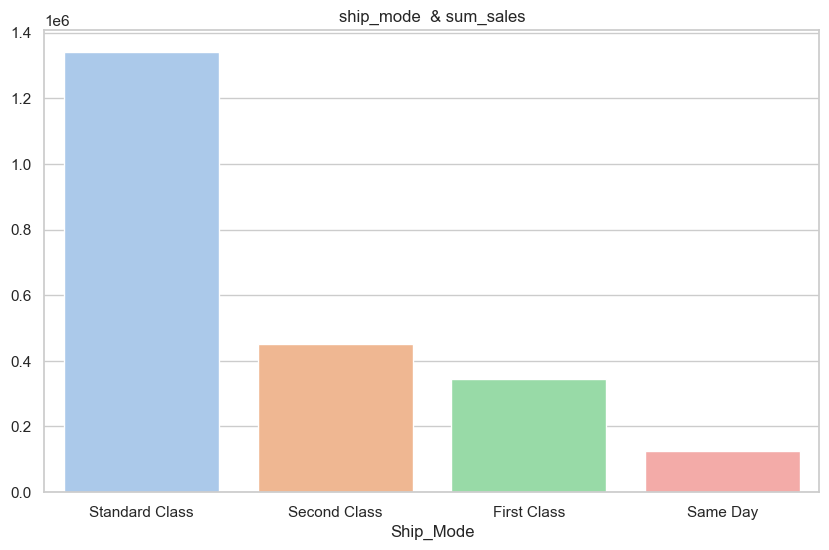

In [25]:
shipment_group = df.groupby(['Ship_Mode']).agg(
                sum_sales=('Sales','sum')).sort_values(by='sum_sales',ascending=False).reset_index()
shipment_group=shipment_group.head(5)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=shipment_group, x='Ship_Mode', y='sum_sales', palette="pastel")
plt.title("ship_mode  & sum_sales",fontsize=12)
plt.ylabel("")

In [26]:
# Standard ship mode work well

# Delivery days 

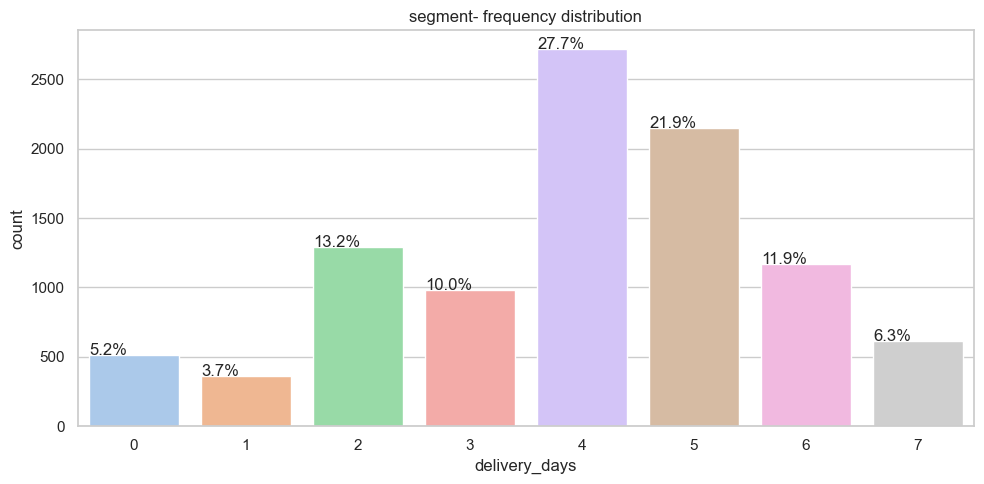

In [41]:
df['delivery_days']=(df['Ship_Date']-df['Order_Date']).dt.days

delive_daycol = "delivery_days"


sns.set_theme(style='whitegrid')
val = df[delive_daycol].value_counts().sort_index(ascending=True)
plt.figure(figsize=(10,5))

ax = sns.countplot(df, x=delive_daycol 
                   , palette="pastel"
                   # , stat="percent"
                   , order=val.index
                   )

summ = val.sum()

title = val.index
lbls = [f'{p[0] * 100 / summ:.1f}%' for p in zip(val)]

# vetical label x=col
for p, label in zip(ax.patches, lbls):
    ax.annotate(label, (p.get_x(), p.get_height() + 0.15))

plt.title("segment- frequency distribution",fontsize=12)
plt.tight_layout()
plt.show()

In [42]:
# Average delivery day taken is 4 days

# Sales of top and bottom 10 cities

Text(416.72727272727263, 0.5, '')

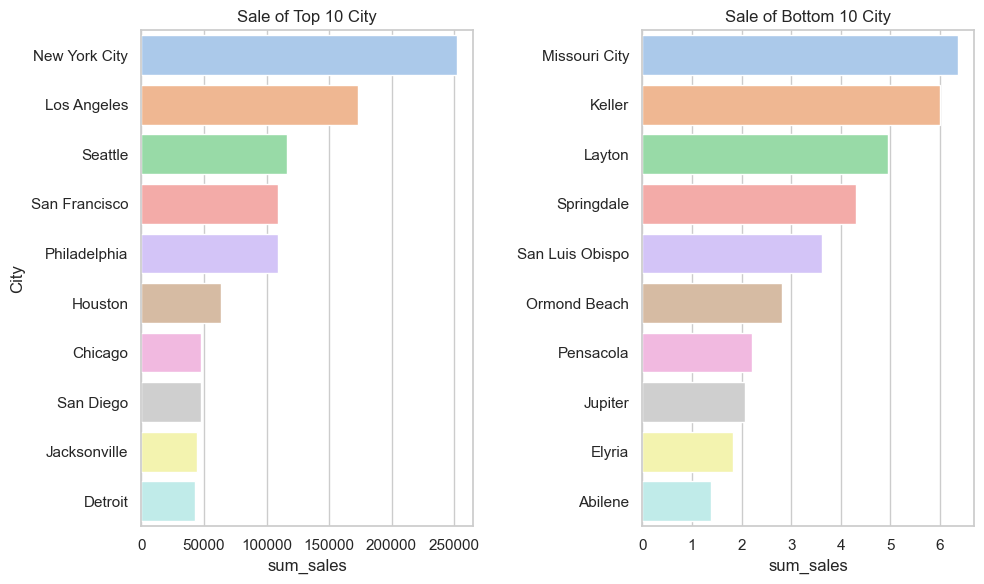

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
group_df =df.groupby(['City']).agg(
         
         sum_sales = ('Sales','sum'),
         ).sort_values(by='sum_sales',ascending=False).reset_index()
top=group_df.head(10)
bottom=group_df.tail(10)
sns.barplot(data=top, y='City', x='sum_sales', palette="pastel",ax=ax[0])
sns.barplot(data=bottom, y='City', x='sum_sales', palette="pastel",ax=ax[1])
ax[0].title.set_text('Sale of Top 10 City')
ax[1].title.set_text('Sale of Bottom 10 City')
plt.tight_layout()
plt.ylabel("")

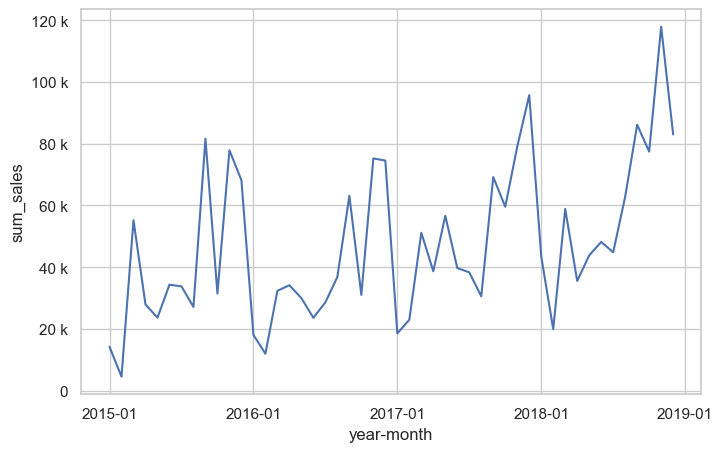

In [50]:
df["year"]=df['Order_Date']. dt.year #int
df["month"]=df['Order_Date']. dt. month #int
df["year-month"]=df['Order_Date'].dt.strftime('%Y-%m')#format YYYY-MM
df['month_name'] = df['Order_Date'].dt.strftime("%b") #Jan


group_df =df.groupby(['year-month']).agg(
         
         sum_sales = ('Sales','sum'),
         ).sort_values(by='year-month',ascending=True).reset_index()

import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(8, 5)) 
gfg=sns.lineplot(x = "year-month", y = "sum_sales", data=group_df)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
gfg.set_xticks(range(1,13)) 
xtick_loc = [ '2015-01','2016-01','2017-01',
            '2018-01', '2019-01']
ax.set_xticks(xtick_loc)

plt.show()


In [51]:
# Sales trend is increasing yearly

# Sales according to months

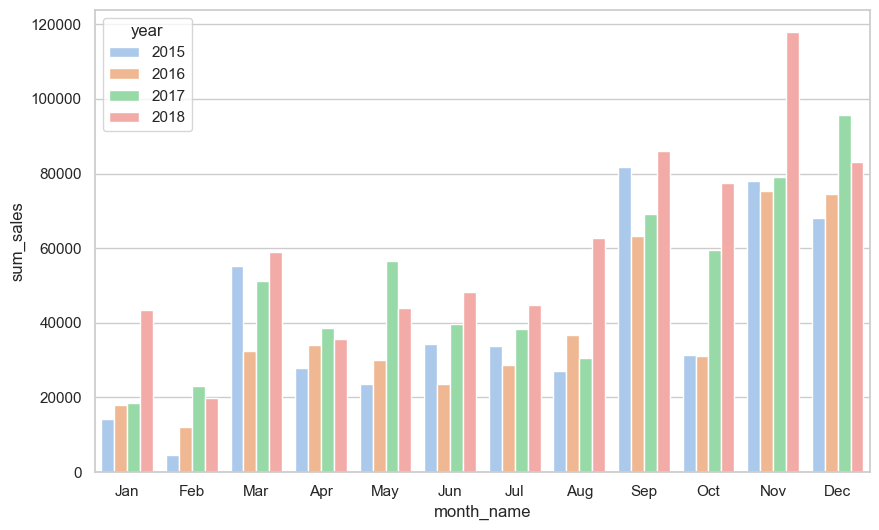

In [53]:
group_df =df.groupby(['year','month','month_name','year-month']).agg(
         sum_sales = ('Sales','sum')).sort_values(by='year-month',ascending=True).reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=group_df, x='month_name', y='sum_sales', hue='year', palette="pastel")

In [54]:
# Ever year sale increases in the end months as compared to the respective whole year.